In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [37]:
csv_path = 'E:\Subash\Python\Data_Science_Practice\Case_Study\Original_1995-1999_Fuel_Consumption_Ratings.csv'
df = pd.read_csv(csv_path, header=[0,1])
df.head()

,MODEL,MAKE,MODEL,VEHICLE CLASS,ENGINE SIZE,CYLINDERS,TRANSMISSION,FUEL,FUEL CONSUMPTION,Unnamed: 9_level_0,Unnamed: 10_level_0,Unnamed: 11_level_0,CO2 EMISSIONS
,YEAR,Unnamed: 1_level_1,# = high output engine,Unnamed: 3_level_1,(L),Unnamed: 5_level_1,Unnamed: 6_level_1,TYPE,CITY (L/100 km),HWY (L/100 km),COMB (L/100 km),COMB (mpg),(g/km)
0,1995,ACURA,INTEGRA,SUBCOMPACT,1.8,4,A4,X,10.2,7.0,8.8,32,202
1,1995,ACURA,INTEGRA,SUBCOMPACT,1.8,4,M5,X,9.6,7.0,8.4,34,193
2,1995,ACURA,INTEGRA GS-R,SUBCOMPACT,1.8,4,M5,Z,9.4,7.0,8.3,34,191
3,1995,ACURA,LEGEND,COMPACT,3.2,6,A4,Z,12.6,8.9,10.9,26,251
4,1995,ACURA,LEGEND COUPE,COMPACT,3.2,6,A4,Z,13.0,9.3,11.3,25,260


In [38]:
df.columns = df.columns.map('_'.join)
df.head()

,MODEL_YEAR,MAKE_Unnamed: 1_level_1,MODEL_# = high output engine,VEHICLE CLASS_Unnamed: 3_level_1,ENGINE SIZE_(L),CYLINDERS_Unnamed: 5_level_1,TRANSMISSION_Unnamed: 6_level_1,FUEL_TYPE,FUEL CONSUMPTION_CITY (L/100 km),Unnamed: 9_level_0_HWY (L/100 km),Unnamed: 10_level_0_COMB (L/100 km),Unnamed: 11_level_0_COMB (mpg),CO2 EMISSIONS _(g/km)
0,1995,ACURA,INTEGRA,SUBCOMPACT,1.8,4,A4,X,10.2,7.0,8.8,32,202
1,1995,ACURA,INTEGRA,SUBCOMPACT,1.8,4,M5,X,9.6,7.0,8.4,34,193
2,1995,ACURA,INTEGRA GS-R,SUBCOMPACT,1.8,4,M5,Z,9.4,7.0,8.3,34,191
3,1995,ACURA,LEGEND,COMPACT,3.2,6,A4,Z,12.6,8.9,10.9,26,251
4,1995,ACURA,LEGEND COUPE,COMPACT,3.2,6,A4,Z,13.0,9.3,11.3,25,260


In [39]:
df.rename(columns={'ENGINE SIZE_(L)':'ENGINE_SIZE', 'CYLINDERS_Unnamed: 5_level_1':'CYLINDERS', 'Unnamed: 10_level_0_COMB (L/100 km)':'FUEL_CONSUMPTION_COMB', 'CO2 EMISSIONS _(g/km)':'CO2_EMISSIONS',
                  'FUEL CONSUMPTION_CITY (L/100 km)': 'FUEL_CONSUMPTION_CITY', 'Unnamed: 9_level_0_HWY (L/100 km)':'FUEL_CONSUMPTION_HWY'}, inplace=True)
df.head()

,MODEL_YEAR,MAKE_Unnamed: 1_level_1,MODEL_# = high output engine,VEHICLE CLASS_Unnamed: 3_level_1,ENGINE_SIZE,CYLINDERS,TRANSMISSION_Unnamed: 6_level_1,FUEL_TYPE,FUEL_CONSUMPTION_CITY,FUEL_CONSUMPTION_HWY,FUEL_CONSUMPTION_COMB,Unnamed: 11_level_0_COMB (mpg),CO2_EMISSIONS
0,1995,ACURA,INTEGRA,SUBCOMPACT,1.8,4,A4,X,10.2,7.0,8.8,32,202
1,1995,ACURA,INTEGRA,SUBCOMPACT,1.8,4,M5,X,9.6,7.0,8.4,34,193
2,1995,ACURA,INTEGRA GS-R,SUBCOMPACT,1.8,4,M5,Z,9.4,7.0,8.3,34,191
3,1995,ACURA,LEGEND,COMPACT,3.2,6,A4,Z,12.6,8.9,10.9,26,251
4,1995,ACURA,LEGEND COUPE,COMPACT,3.2,6,A4,Z,13.0,9.3,11.3,25,260


In [40]:
cdf = df[['ENGINE_SIZE', 'CYLINDERS', 'FUEL_CONSUMPTION_COMB', 'CO2_EMISSIONS']]

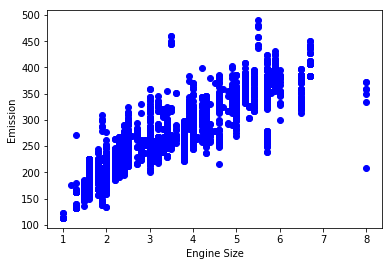

In [41]:
# Plot the scatter plot for Engine size
plt.scatter(cdf.ENGINE_SIZE, cdf.CO2_EMISSIONS, color='blue')
plt.xlabel('Engine Size')
plt.ylabel('Emission')
plt.show()

In [42]:
# Train the data
msk = np.random.rand(len(df)) < 0.8
train = df[msk]
test = df[~msk]

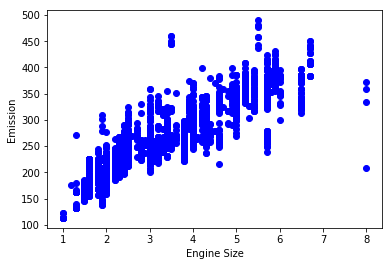

In [43]:
# Train data distribution
plt.scatter(train.ENGINE_SIZE, train.CO2_EMISSIONS, color = 'blue')
plt.xlabel('Engine Size')
plt.ylabel('Emission')
plt.show()

Multiple Regression Model

In reality, there are multiple variables that predict the Co2emission. When more than one independent variable is present, the process is called multiple linear regression. For example, predicting co2emission using FUELCONSUMPTION_COMB, EngineSize and Cylinders of cars. The good thing here is that Multiple linear regression is the extension of simple linear regression model.

In [44]:
from sklearn import linear_model
regr = linear_model.LinearRegression()

x = np.asanyarray(train[['ENGINE_SIZE', 'CYLINDERS', 'FUEL_CONSUMPTION_COMB']])
y = np.asanyarray(train[['CO2_EMISSIONS']])

regr.fit(x,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [45]:
# print the linear coefficients
print ('Coefficient: ', regr.coef_)

('Coefficient: ', array([[ 5.87910853, -1.36429197, 20.99884613]]))


Ordinary Least Squares (OLS)

OLS is a method for estimating the unknown parameters in a linear regression model. OLS chooses the parameters of a linear function of a set of explanatory variables by minimizing the sum of the squares of the differences between the target dependent variable and those predicted by the linear function. In other words, it tries to minimizes the sum of squared errors (SSE) or mean squared error (MSE) between the target variable (y) and our predicted output ( ŷ y^ ) over all samples in the dataset.

In [27]:
yhat = regr.predict(test[['ENGINE_SIZE', 'CYLINDERS', 'FUEL_CONSUMPTION_COMB']])
x = np.asanyarray(test[['ENGINE_SIZE', 'CYLINDERS', 'FUEL_CONSUMPTION_COMB']])
y = np.asanyarray(test[['CO2_EMISSIONS']])

print('Residual Sum of Square: %.2f' % np.mean((yhat - y) ** 2))

# Variance Score
print('Variance Score: %.2f' % regr.score(x, y))

Residual Sum of Square: 26.91
Variance Score: 0.99


Try to use a multiple linear regression with the same dataset but this time use FUEL CONSUMPTION in CITY and FUEL CONSUMPTION in HWY instead of FUELCONSUMPTION_COMB. Does it result in better accuracy?

In [49]:
regr = linear_model.LinearRegression()
x = np.asanyarray(train[['ENGINE_SIZE', 'CYLINDERS', 'FUEL_CONSUMPTION_CITY', 'FUEL_CONSUMPTION_HWY']])
y = np.asanyarray(train[['CO2_EMISSIONS']])
regr.fit(x, y)

yhat = regr.predict(test[['ENGINE_SIZE', 'CYLINDERS', 'FUEL_CONSUMPTION_CITY', 'FUEL_CONSUMPTION_HWY']])
x = np.asanyarray(test[['ENGINE_SIZE', 'CYLINDERS', 'FUEL_CONSUMPTION_CITY', 'FUEL_CONSUMPTION_HWY']])
y = np.asanyarray(test[['CO2_EMISSIONS']])

print('Residual Sum of Square: %.2f' % np.mean((yhat - y)**2))
print('Variance Score: %.2f' % regr.score(x, y))

Residual Sum of Square: 92.77
Variance Score: 0.98
